In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression

In [2]:
unprocessed = pd.read_csv("../data/curated/input.csv")

In [3]:
unprocessed.columns

Index(['URL', 'Rent_Price', 'Address', 'Bedrooms', 'Bathrooms', 'Parking',
       'Property_Type', 'Latitude', 'Longitude', 'Date_Available', 'Bond',
       'Internal_Area', 'Land_Area', 'Street', 'Suburb', 'Postcode',
       'Street_Name', 'Property_Size', 'geometry', 'Distances to CBD',
       'Durations to CBD', 'SA2_CODE21', 'SA2_NAME21', 'AREASQKM21',
       'LOCI_URI21', 'suburb_geometry', 'Distance_to_Nearest_Station_km',
       'Feature_Count', 'Cleaned_Text', 'Sentiment', 'Dominant_Topic_Label',
       'Built in wardrobes', 'Dishwasher', 'Air conditioning', 'Floorboards',
       'Secure Parking', 'Intercom', 'Heating', 'Ensuite', 'Balcony / Deck',
       'Fully fenced', 'Days_From_Now', 'negative_class', 'positive_class',
       'geometr_2km', 'School_Counts'],
      dtype='object')

In [4]:
unprocessed.describe()

,Rent_Price,Bedrooms,Bathrooms,Parking,Latitude,Longitude,Bond,Internal_Area,Land_Area,Postcode,...,Secure Parking,Intercom,Heating,Ensuite,Balcony / Deck,Fully fenced,Days_From_Now,negative_class,positive_class,School_Counts
count,12301.000000,12301.000000,12301.000000,12301.000000,12301.000000,12301.000000,11378.000000,140.000000,624.000000,12301.000000,...,12301.000000,12301.000000,12301.000000,12301.000000,12301.000000,12301.000000,12301.000000,12301.000000,12301.000000,12301.000000
mean,571.253883,2.529063,1.506788,1.245834,-37.789201,144.916317,2493.048427,117.649286,1566.689416,3188.415007,...,0.128933,0.112349,0.096496,0.091050,0.079181,0.075360,7.823510,0.057312,0.939924,5.942606
std,145.661823,1.062474,0.570029,0.864785,0.378443,0.482061,2710.757127,199.806979,13750.084016,236.311636,...,0.335139,0.315808,0.295283,0.287691,0.270031,0.263982,25.891455,0.232448,0.237638,3.486040
min,155.000000,0.000000,0.000000,0.000000,-38.396861,141.588032,3.000000,2.000000,1.000000,3000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,480.000000,2.000000,1.000000,1.000000,-37.885132,144.867198,2063.000000,55.300000,300.750000,3030.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
50%,550.000000,2.000000,1.000000,1.000000,-37.820562,144.968185,2390.000000,73.600000,512.000000,3124.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
75%,650.000000,3.000000,2.000000,2.000000,-37.765955,145.070539,2824.000000,92.000000,654.250000,3204.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,8.000000
max,995.000000,5.000000,5.000000,5.000000,-34.168360,147.679251,282440.000000,2020.000000,283279.949400,3978.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1032.000000,1.000000,1.000000,17.000000


/Users/tinas/anaconda3/envs/garyenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tinas/anaconda3/envs/garyenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tinas/anaconda3/envs/garyenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tinas/anaconda3/envs/garyenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

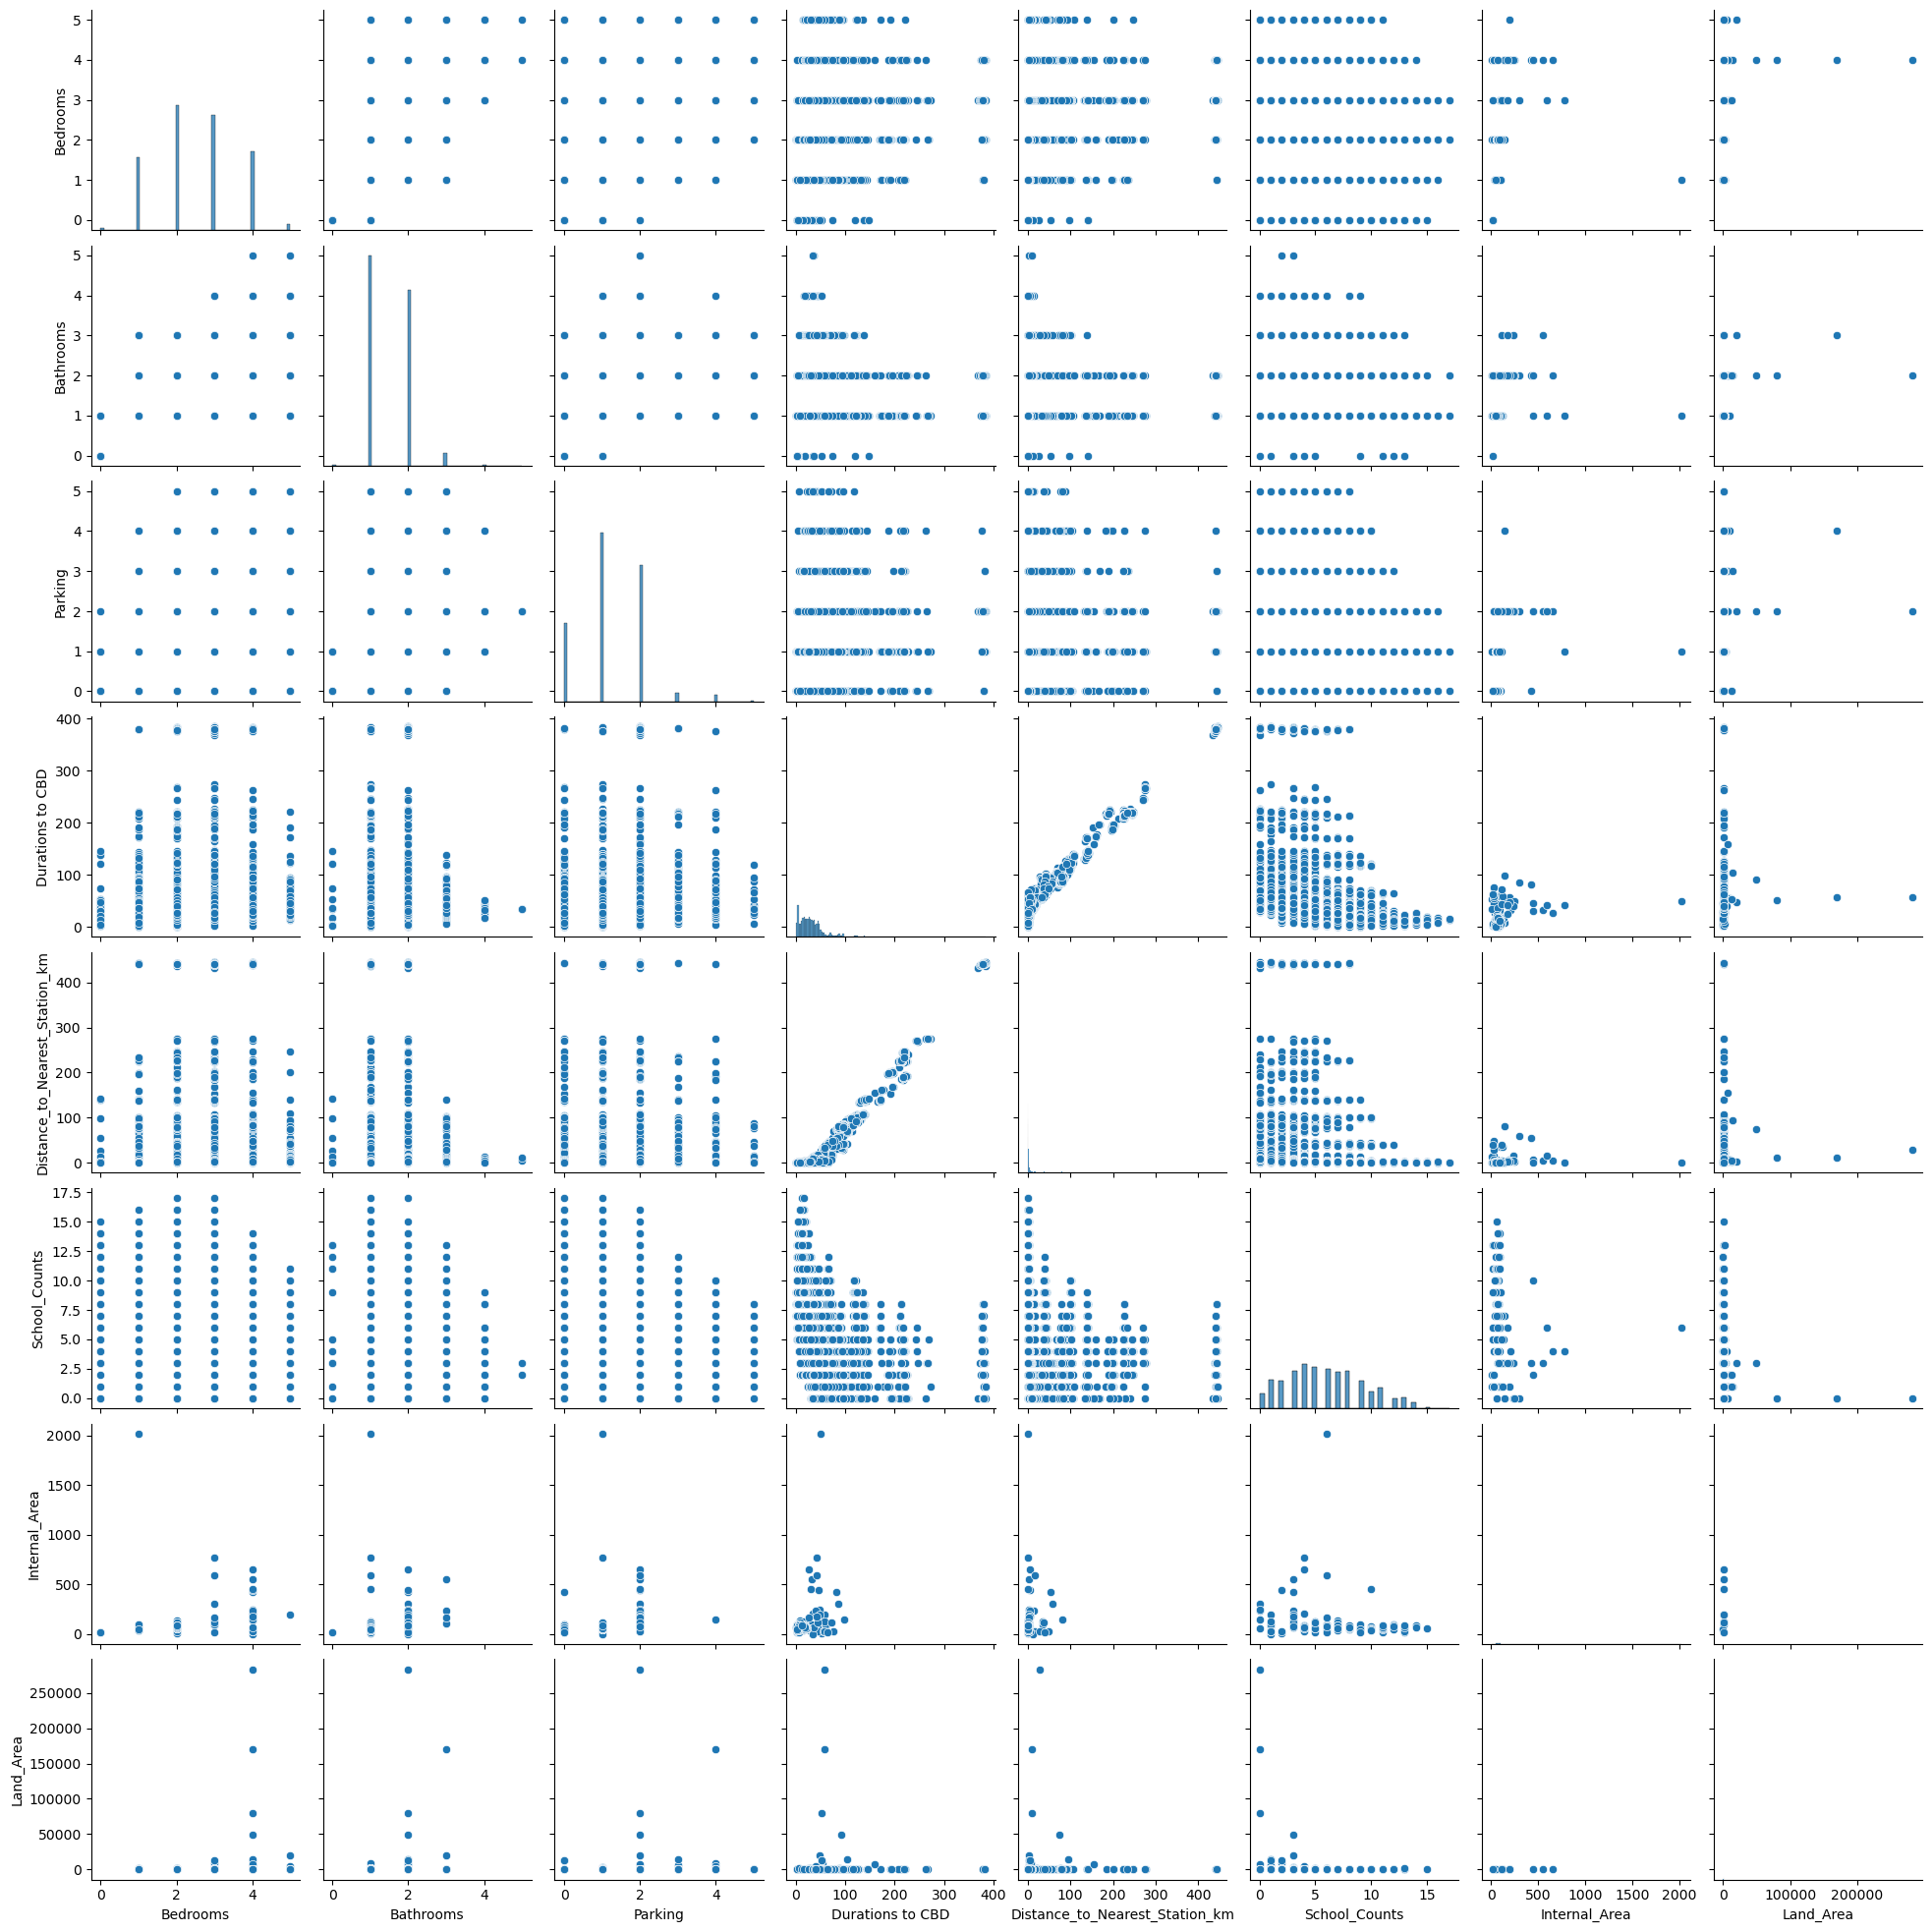

In [5]:
sns.pairplot(unprocessed[['Bedrooms', 'Bathrooms', 'Parking', 'Durations to CBD','Distance_to_Nearest_Station_km', 'School_Counts', 'Internal_Area', 'Land_Area']])
plt.show()


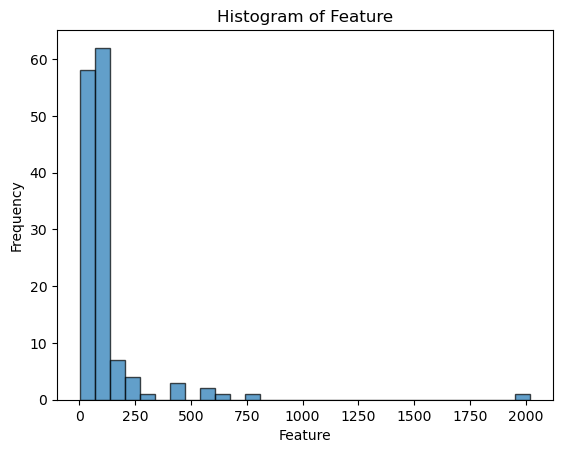

In [6]:
plt.hist(unprocessed['Internal_Area'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()

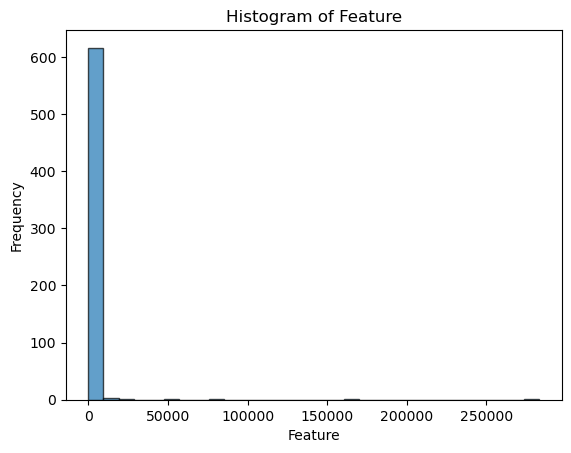

In [7]:
plt.hist(unprocessed['Land_Area'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()

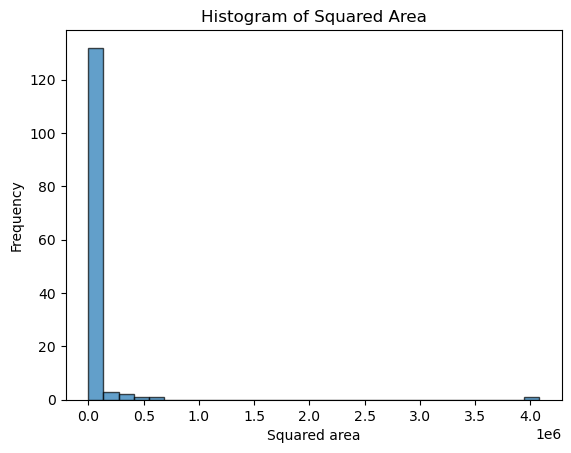

In [8]:
unprocessed['IntArea_squared'] = np.square(unprocessed['Internal_Area'])

plt.hist(unprocessed['IntArea_squared'], bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Squared area')
plt.ylabel('Frequency')
plt.title('Histogram of Squared Area')
plt.show()

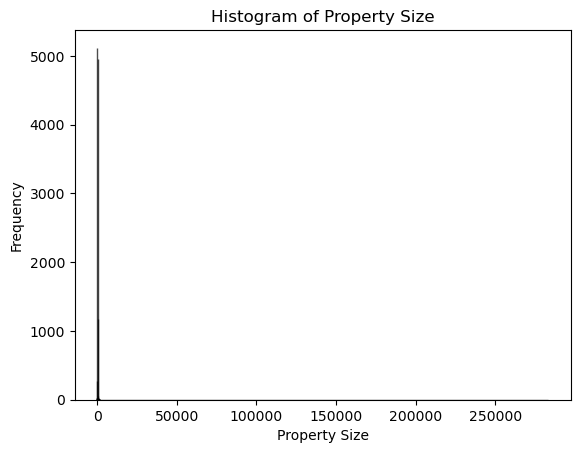

In [9]:
plt.hist(unprocessed['Property_Size'], bins="auto", edgecolor='k', alpha=0.7)
plt.xlabel('Property Size')
plt.ylabel('Frequency')
plt.title('Histogram of Property Size')
plt.show()


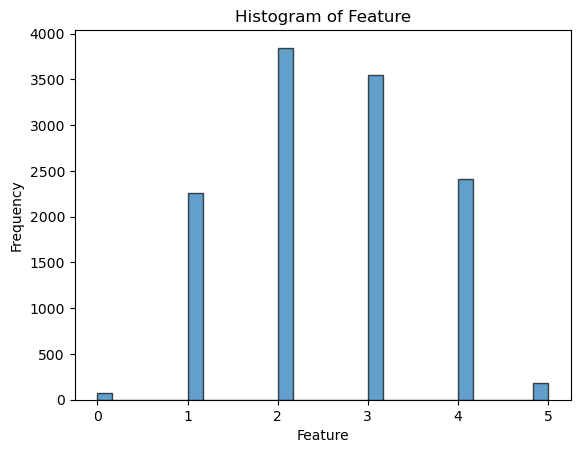

In [10]:
plt.hist(unprocessed['Bedrooms'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()


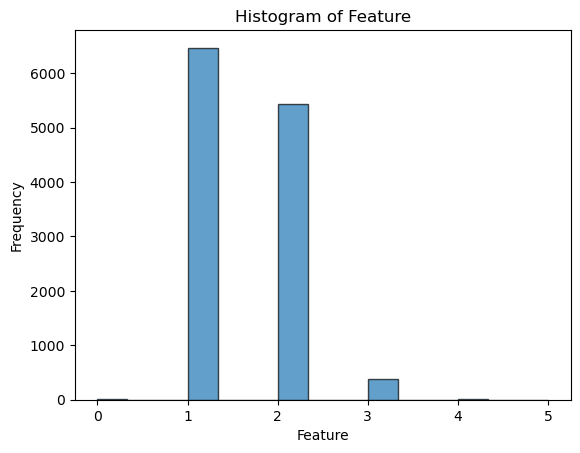

In [11]:
plt.hist(unprocessed['Bathrooms'], bins=15, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()

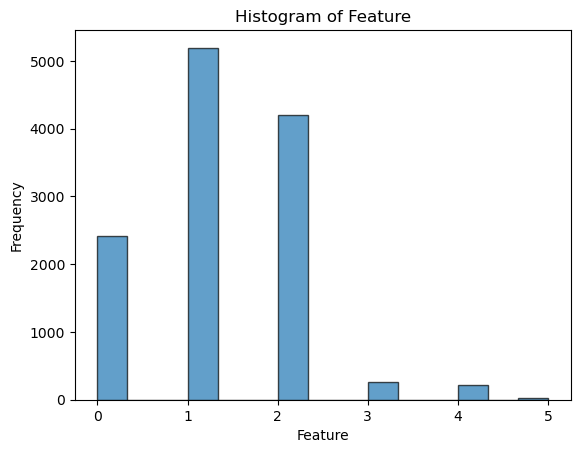

In [12]:
plt.hist(unprocessed['Parking'], bins=15, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()


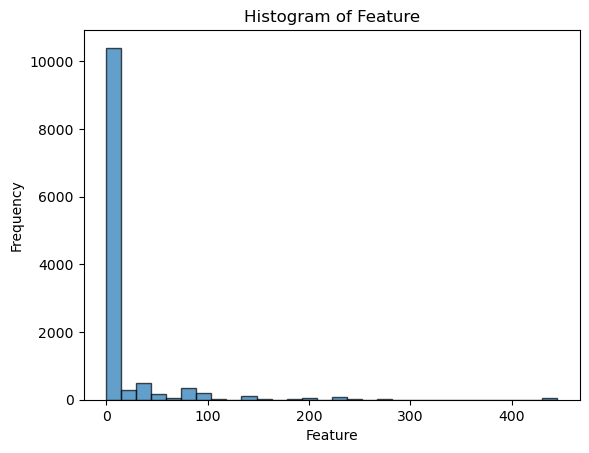

In [13]:
plt.hist(unprocessed['Distance_to_Nearest_Station_km'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()


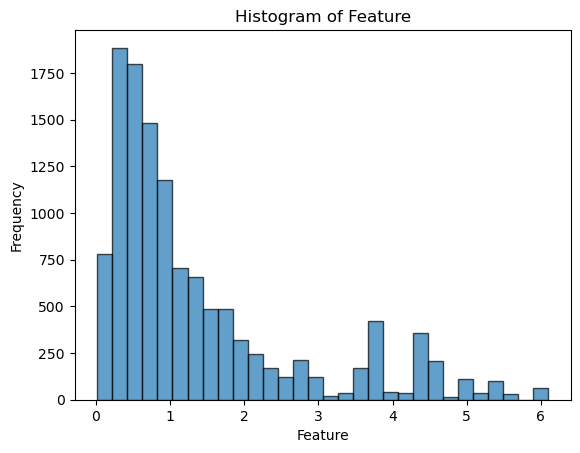

In [14]:
unprocessed['Distance_to_Nearest_Station_log'] = np.log1p(unprocessed['Distance_to_Nearest_Station_km']) 
plt.hist(unprocessed['Distance_to_Nearest_Station_log'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()


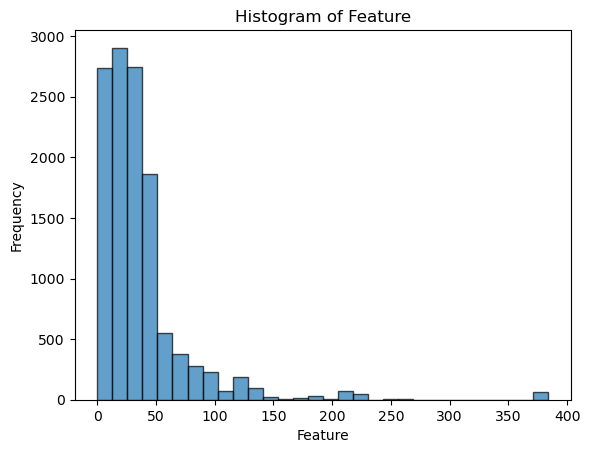

In [15]:
plt.hist(unprocessed['Durations to CBD'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()


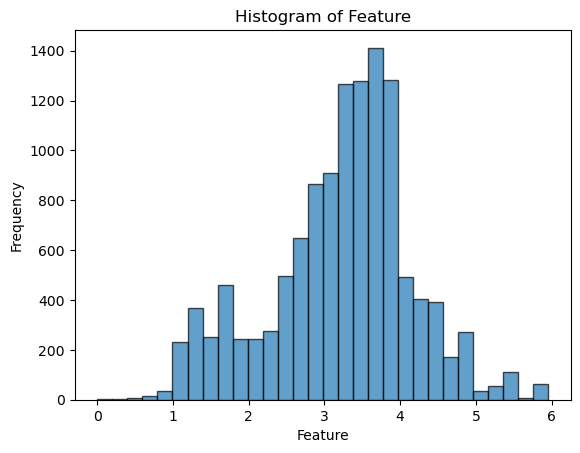

In [16]:
unprocessed['CBDDurations_log'] = np.log1p(unprocessed['Durations to CBD']) 
plt.hist(unprocessed['CBDDurations_log'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()


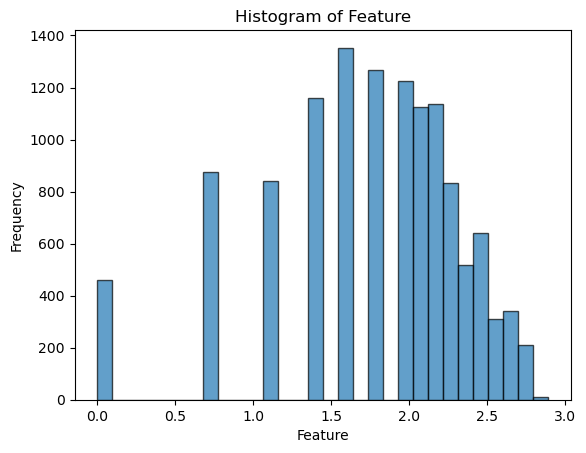

In [17]:
unprocessed['School_Counts_log'] = np.log1p(unprocessed['School_Counts'])
plt.hist(unprocessed['School_Counts_log'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()


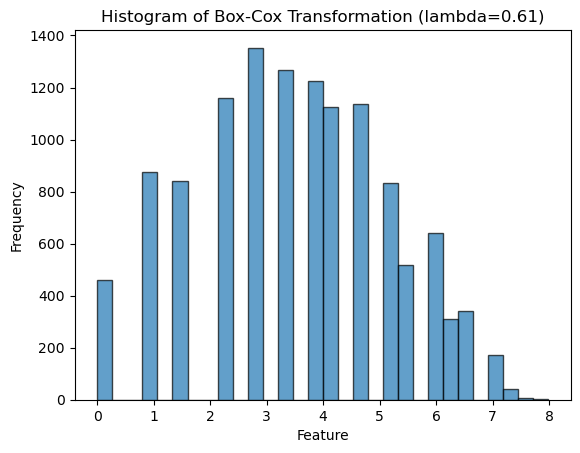

In [18]:
from scipy.stats import boxcox

# Apply Box-Cox transformation (add 1 to handle zero values)
school_counts_positive = unprocessed['School_Counts'] + 1
unprocessed['School_Counts_boxcox'], lambda_ = boxcox(school_counts_positive)

plt.hist(unprocessed['School_Counts_boxcox'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title(f'Histogram of Box-Cox Transformation (lambda={lambda_:.2f})')
plt.show()


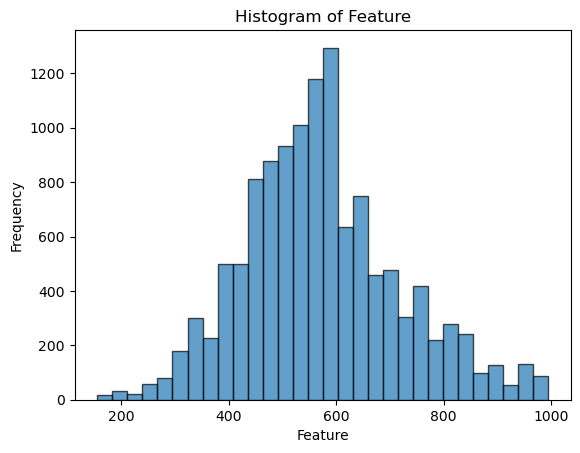

In [19]:

plt.hist(unprocessed['Rent_Price'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()


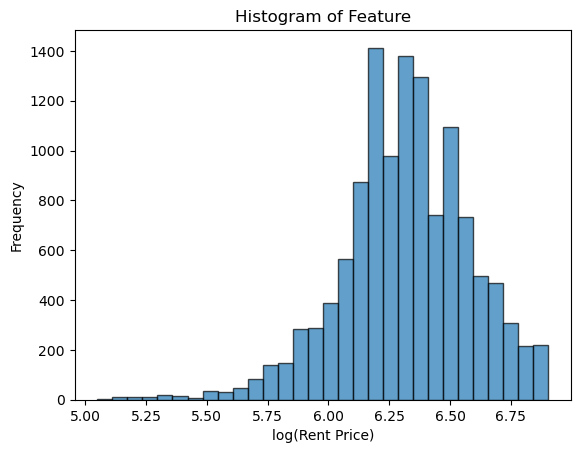

In [20]:
unprocessed["Rent_Price_log"] = np.log1p(unprocessed["Rent_Price"])
plt.hist(unprocessed['Rent_Price_log'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('log(Rent Price)')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()

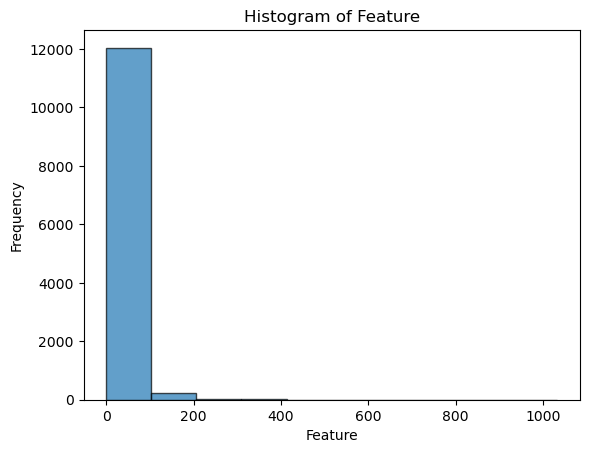

In [21]:
plt.hist(unprocessed['Days_From_Now'], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()


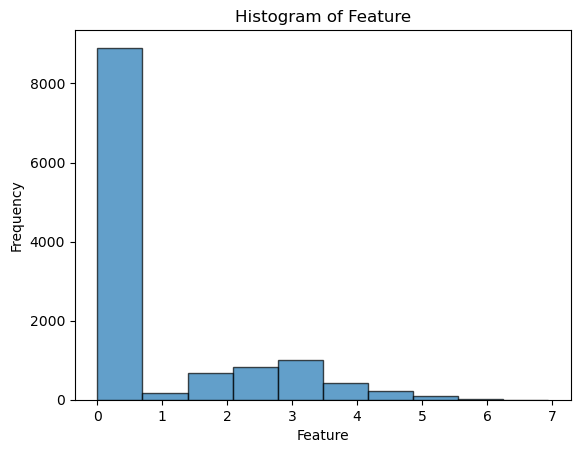

In [22]:
plt.hist(np.log1p(unprocessed['Days_From_Now']), bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()
unprocessed['Days_From_Now'] = np.log1p(unprocessed['Days_From_Now'])

In [23]:
unprocessed.columns

Index(['URL', 'Rent_Price', 'Address', 'Bedrooms', 'Bathrooms', 'Parking',
       'Property_Type', 'Latitude', 'Longitude', 'Date_Available', 'Bond',
       'Internal_Area', 'Land_Area', 'Street', 'Suburb', 'Postcode',
       'Street_Name', 'Property_Size', 'geometry', 'Distances to CBD',
       'Durations to CBD', 'SA2_CODE21', 'SA2_NAME21', 'AREASQKM21',
       'LOCI_URI21', 'suburb_geometry', 'Distance_to_Nearest_Station_km',
       'Feature_Count', 'Cleaned_Text', 'Sentiment', 'Dominant_Topic_Label',
       'Built in wardrobes', 'Dishwasher', 'Air conditioning', 'Floorboards',
       'Secure Parking', 'Intercom', 'Heating', 'Ensuite', 'Balcony / Deck',
       'Fully fenced', 'Days_From_Now', 'negative_class', 'positive_class',
       'geometr_2km', 'School_Counts', 'IntArea_squared',
       'Distance_to_Nearest_Station_log', 'CBDDurations_log',
       'School_Counts_log', 'School_Counts_boxcox', 'Rent_Price_log'],
      dtype='object')

In [24]:
unprocessed = unprocessed.drop(["Street"], axis = 1)


In [25]:
unprocessed = unprocessed[['Rent_Price_log', 'Bedrooms', 'Bathrooms', 'Parking', 'Property_Type',
        'Suburb', 'Postcode', 'Distance_to_Nearest_Station_log', 'CBDDurations_log',
        'Sentiment',  "Feature_Count", "Bond",
       'Dominant_Topic_Label', 'negative_class',
       'positive_class', 'School_Counts_boxcox', "Property_Size",  "Date_Available",
        'Built in wardrobes', 'Dishwasher', 'Air conditioning', 'Floorboards',
       'Secure Parking', 'Intercom', 'Heating', 'Ensuite', 'Balcony / Deck',
       'Fully fenced', 'Days_From_Now']]
unprocessed.columns


Index(['Rent_Price_log', 'Bedrooms', 'Bathrooms', 'Parking', 'Property_Type',
       'Suburb', 'Postcode', 'Distance_to_Nearest_Station_log',
       'CBDDurations_log', 'Sentiment', 'Feature_Count', 'Bond',
       'Dominant_Topic_Label', 'negative_class', 'positive_class',
       'School_Counts_boxcox', 'Property_Size', 'Date_Available',
       'Built in wardrobes', 'Dishwasher', 'Air conditioning', 'Floorboards',
       'Secure Parking', 'Intercom', 'Heating', 'Ensuite', 'Balcony / Deck',
       'Fully fenced', 'Days_From_Now'],
      dtype='object')

In [26]:
unprocessed.isnull().sum()

Rent_Price_log                       0
Bedrooms                             0
Bathrooms                            0
Parking                              0
Property_Type                        0
Suburb                               0
Postcode                             0
Distance_to_Nearest_Station_log      0
CBDDurations_log                     0
Sentiment                            0
Feature_Count                        0
Bond                               923
Dominant_Topic_Label                 0
negative_class                       0
positive_class                       0
School_Counts_boxcox                 0
Property_Size                        0
Date_Available                       0
Built in wardrobes                   0
Dishwasher                           0
Air conditioning                     0
Floorboards                          0
Secure Parking                       0
Intercom                             0
Heating                              0
Ensuite                  

- Nominal: 'Property_Type', 'Suburb', 'Postcode', 'Dominant_Topic'(HL), 'Street_Name'
- Numerical continuous: 'Sentiment'(PD), 
- Numerical discrete: 'Bedrooms', 'Bathrooms', 'Parking', 'CountOfSchool', 'negative_class'(PD), 'positive_class'(PD), 'School_counts'
- TextData: 'Cleaned_text' -> property description, 'Cleaned_HLTokens'-> Headline

In [27]:
processed = unprocessed.copy()

In [28]:
categorical = ['Property_Type', 'Suburb', 'Postcode', 'Dominant_Topic', 'Sentiment', "Date_Available",
               'Built in wardrobes', 'Dishwasher', 'Air conditioning', 'Floorboards',
                'Secure Parking', 'Intercom', 'Heating', 'Ensuite', 'Balcony / Deck',
                'Fully fenced']

                                 Bedrooms  Bathrooms  CBDDurations_log  \
Bedrooms                         1.000000   0.623786          0.509418   
Bathrooms                        0.623786   1.000000          0.254776   
CBDDurations_log                 0.509418   0.254776          1.000000   
Parking                          0.649134   0.431360          0.498208   
negative_class                  -0.054972  -0.033922          0.003555   
positive_class                   0.055377   0.036321         -0.005788   
Sentiment                        0.150824   0.108564          0.010483   
School_Counts_boxcox            -0.537101  -0.382634         -0.623886   
Distance_to_Nearest_Station_log  0.362785   0.176065          0.745016   
Bond                             0.070079   0.095411         -0.065763   
Property_Size                    0.042387   0.032236          0.030972   
Feature_Count                   -0.020755   0.079614         -0.138560   
Rent_Price_log                   0.362

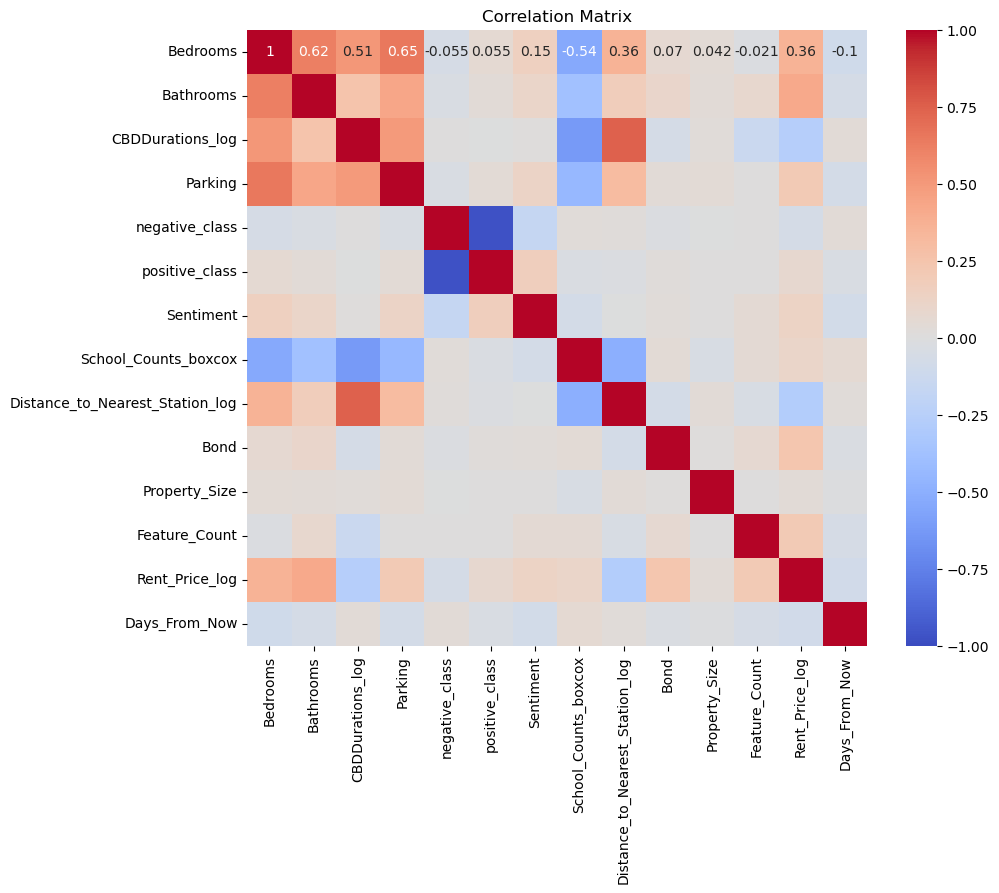

In [29]:
correlation_matrix = processed[['Bedrooms', 'Bathrooms', 'CBDDurations_log', 
                                'Parking','negative_class', 'positive_class',
                                'Sentiment','School_Counts_boxcox', 
                                'Distance_to_Nearest_Station_log', 'Bond', 
                                "Property_Size","Feature_Count", 'Rent_Price_log', "Days_From_Now"]].corr()

print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


### Normalisation & Encoding

In [30]:
numerical_features =['Bedrooms', 'Bathrooms', 'CBDDurations_log', 
                    'Parking','negative_class', 'positive_class',
                    'Sentiment','School_Counts_boxcox', 
                    'Distance_to_Nearest_Station_log', 'Bond', 
                    "Property_Size","Feature_Count", 'Days_From_Now']
categorical_features = ['Property_Type', 'Suburb', 'Postcode', 'Dominant_Topic', 'Sentiment', "Date_Available",
               'Built in wardrobes', 'Dishwasher', 'Air conditioning', 'Floorboards',
                'Secure Parking', 'Intercom', 'Heating', 'Ensuite', 'Balcony / Deck',
                'Fully fenced']

In [31]:
X = processed.drop(["Rent_Price_log"], axis = 1)
y = processed['Rent_Price_log']

In [32]:
X.isnull().sum()

Bedrooms                             0
Bathrooms                            0
Parking                              0
Property_Type                        0
Suburb                               0
Postcode                             0
Distance_to_Nearest_Station_log      0
CBDDurations_log                     0
Sentiment                            0
Feature_Count                        0
Bond                               923
Dominant_Topic_Label                 0
negative_class                       0
positive_class                       0
School_Counts_boxcox                 0
Property_Size                        0
Date_Available                       0
Built in wardrobes                   0
Dishwasher                           0
Air conditioning                     0
Floorboards                          0
Secure Parking                       0
Intercom                             0
Heating                              0
Ensuite                              0
Balcony / Deck           

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [34]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

categorical_encoding = ['Property_Type', 'Suburb', 'Postcode', 'Dominant_Topic_Label']
onehot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
onehot_encoder.fit(X_train[categorical_encoding])

X_train_encoded = onehot_encoder.transform(X_train[categorical_encoding])
X_test_encoded = onehot_encoder.transform(X_test[categorical_encoding])

encoded_columns = onehot_encoder.get_feature_names_out(categorical_encoding)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns, index=X_test.index)

X_train = pd.concat([X_train.drop(columns=categorical_encoding), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_encoding), X_test_encoded_df], axis=1)


X_train['Date_Available'] = X_train['Date_Available'].map({'Available Now': 1, 'Later': 0})
X_test['Date_Available'] = X_test['Date_Available'].map({'Available Now': 1, 'Later': 0})

print(X_train.head())
print(X_test.head())


       Bedrooms  Bathrooms  Parking  Distance_to_Nearest_Station_log  \
11669       1.0        1.0      1.0                         4.924093   
6198        3.0        1.0      2.0                         0.790785   
8546        4.0        2.0      1.0                         2.052429   
4490        4.0        1.0      2.0                         0.688132   
11113       2.0        1.0      1.0                         5.244562   

       CBDDurations_log  Sentiment  Feature_Count    Bond  negative_class  \
11669          4.919443   0.104762            1.0  1430.0             0.0   
6198           3.240141   0.456667            0.0  1993.0             0.0   
8546           3.661303   0.412500            0.0  2237.0             0.0   
4490           2.885741   0.408636            0.0  3911.0             0.0   
11113          5.383986   0.200000            2.0  1400.0             1.0   

       positive_class  ...  Postcode_3934.0  Postcode_3936.0  Postcode_3938.0  \
11669             1.0  

/Users/tinas/anaconda3/envs/garyenv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [35]:
imputer = KNNImputer(n_neighbors=3)

X_train[['Bond']] = imputer.fit_transform(X_train[['Bond']])
X_test[['Bond']] = imputer.transform(X_test[['Bond']])

In [36]:
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])


X_train_scaled = scaler.transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index)


In [37]:
X_train = X_train.drop(columns=numerical_features)
X_test = X_test.drop(columns=numerical_features)

X_train = pd.concat([X_train, X_train_scaled_df], axis=1)
X_test = pd.concat([X_test, X_test_scaled_df], axis=1)

print(X_train.head())
print(X_test.head())


       Date_Available  Built in wardrobes  Dishwasher  Air conditioning  \
11669               0                   0           0                 0   
6198                0                   0           0                 0   
8546                1                   0           0                 0   
4490                0                   0           0                 0   
11113               1                   1           1                 1   

       Floorboards  Secure Parking  Intercom  Heating  Ensuite  \
11669            0               0         0        0        0   
6198             0               0         0        0        0   
8546             0               0         0        0        0   
4490             0               0         0        0        0   
11113            0               0         1        0        0   

       Balcony / Deck  ...   Parking  negative_class  positive_class  \
11669               0  ... -0.282144       -0.242715        0.249614   
6198    

In [38]:
mi_scores = mutual_info_regression(X_train, y_train)
mi_scores_df = pd.DataFrame({'Feature': X_train.columns, 'MI Score': mi_scores})

features = mi_scores_df.sort_values(by='MI Score', ascending=False)

print(features.head(30))

top_features = features['Feature'].iloc[:30].values
top_features

                             Feature  MI Score
774                             Bond  3.653472
773  Distance_to_Nearest_Station_log  0.240244
767                 CBDDurations_log  0.225143
765                         Bedrooms  0.161983
766                        Bathrooms  0.119408
775                    Property_Size  0.083633
768                          Parking  0.077656
772             School_Counts_boxcox  0.064658
777                    Days_From_Now  0.057902
776                    Feature_Count  0.055996
771                        Sentiment  0.054718
17              Property_Type_Studio  0.044333
13               Property_Type_House  0.029466
693                  Postcode_3350.0  0.020878
0                     Date_Available  0.020610
692                  Postcode_3338.0  0.019069
615                  Postcode_3145.0  0.018188
526                  Postcode_3029.0  0.017991
174                   Suburb_Doveton  0.017656
510                  Postcode_3008.0  0.017292
556          

array(['Bond', 'Distance_to_Nearest_Station_log', 'CBDDurations_log',
       'Bedrooms', 'Bathrooms', 'Property_Size', 'Parking',
       'School_Counts_boxcox', 'Days_From_Now', 'Feature_Count',
       'Sentiment', 'Property_Type_Studio', 'Property_Type_House',
       'Postcode_3350.0', 'Date_Available', 'Postcode_3338.0',
       'Postcode_3145.0', 'Postcode_3029.0', 'Suburb_Doveton',
       'Postcode_3008.0', 'Postcode_3064.0', 'Postcode_3125.0',
       'Postcode_3978.0', 'Postcode_3163.0', 'Property_Type_Townhouse',
       'Suburb_St Albans Park', 'Suburb_Melbourne', 'Postcode_3006.0',
       'Dishwasher', 'Suburb_Lucas'], dtype=object)

In [39]:

mi_scores_df.to_csv("../data/historical/important.csv")

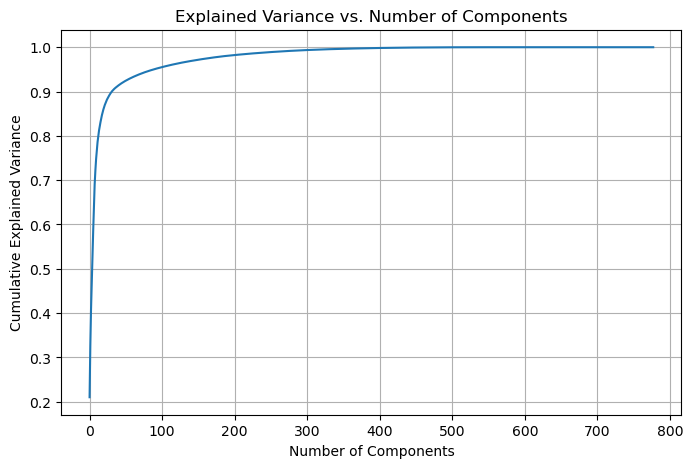

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
pca_full = PCA()
pca_full.fit(X_train)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()


In [41]:
target_variance = 0.95
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= target_variance) + 1

print(f"Number of components to retain 95% of variance: {n_components_95}")


Number of components to retain 95% of variance: 90


In [42]:
pca = PCA(n_components=n_components_95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [43]:
pca_train = pd.DataFrame(X_train_pca)
pca_train
pca_test = pd.DataFrame(X_test_pca)

In [44]:
print(X_train.isnull().sum().sum())  # Should be 0
print(X_test.isnull().sum().sum())   # Should be 0

0
0


In [45]:
mi_scores = mutual_info_regression(pca_train, y_train)
mi_scores_df = pd.DataFrame({'Feature': pca_train.columns, 'MI Score': mi_scores})

feature_ranking = mi_scores_df.sort_values(by='MI Score', ascending=False)

print(feature_ranking.head(30))

top_features = feature_ranking['Feature'].iloc[:30].values
pca_train_top = pca_train[top_features]
pca_test_top = pca_test[top_features]


    Feature  MI Score
2         2  0.201465
36       36  0.152277
48       48  0.126496
38       38  0.119417
37       37  0.119165
39       39  0.117087
46       46  0.114835
4         4  0.113197
1         1  0.106865
40       40  0.103678
64       64  0.100998
51       51  0.099503
35       35  0.093549
77       77  0.090047
43       43  0.089991
58       58  0.089630
45       45  0.089054
41       41  0.088568
66       66  0.088043
49       49  0.082203
55       55  0.080024
0         0  0.078329
34       34  0.076925
44       44  0.076474
60       60  0.075404
61       61  0.075288
59       59  0.073869
14       14  0.072407
47       47  0.071232
69       69  0.070830


In [46]:
top_features

array([ 2, 36, 48, 38, 37, 39, 46,  4,  1, 40, 64, 51, 35, 77, 43, 58, 45,
       41, 66, 49, 55,  0, 34, 44, 60, 61, 59, 14, 47, 69])

In [47]:
input_train = pca_train[top_features]
input_train
input_test = pca_test[top_features]

In [48]:
pca_train.to_csv("../data/input/X_train.csv", index = False)
pca_test.to_csv("../data/input/X_test.csv", index = False)
y_train.to_csv("../data/input/y_train.csv", index = False)
y_test.to_csv("../data/input/y_test.csv", index = False)